In [11]:
import torch
import torch.nn as nn
import numpy as np
import sklearn.datasets as datasets
import matplotlib.pyplot as plt

In [12]:
data = datasets.load_iris()
data

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

In [48]:
X = data['data']
y = data['target']
X = torch.FloatTensor(X)
X

tensor([[5.1000, 3.5000, 1.4000, 0.2000],
        [4.9000, 3.0000, 1.4000, 0.2000],
        [4.7000, 3.2000, 1.3000, 0.2000],
        [4.6000, 3.1000, 1.5000, 0.2000],
        [5.0000, 3.6000, 1.4000, 0.2000],
        [5.4000, 3.9000, 1.7000, 0.4000],
        [4.6000, 3.4000, 1.4000, 0.3000],
        [5.0000, 3.4000, 1.5000, 0.2000],
        [4.4000, 2.9000, 1.4000, 0.2000],
        [4.9000, 3.1000, 1.5000, 0.1000],
        [5.4000, 3.7000, 1.5000, 0.2000],
        [4.8000, 3.4000, 1.6000, 0.2000],
        [4.8000, 3.0000, 1.4000, 0.1000],
        [4.3000, 3.0000, 1.1000, 0.1000],
        [5.8000, 4.0000, 1.2000, 0.2000],
        [5.7000, 4.4000, 1.5000, 0.4000],
        [5.4000, 3.9000, 1.3000, 0.4000],
        [5.1000, 3.5000, 1.4000, 0.3000],
        [5.7000, 3.8000, 1.7000, 0.3000],
        [5.1000, 3.8000, 1.5000, 0.3000],
        [5.4000, 3.4000, 1.7000, 0.2000],
        [5.1000, 3.7000, 1.5000, 0.4000],
        [4.6000, 3.6000, 1.0000, 0.2000],
        [5.1000, 3.3000, 1.7000, 0

In [49]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [5]:
y_class = data['target_names']
y_class

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [50]:
class SOM(nn.Module):
    def __init__(self, m, n, dim):
        super(SOM, self).__init__()
        self.m = m
        self.n = n
        self.dim = dim
        self.alpha = 0.3
        self.sigma = max(m, n) / 2.0
        self.weights = torch.randn(m*n, dim)
        self.pairdist = nn.PairwiseDistance()
        self.locations = torch.Tensor(np.array([np.array([i, j]) for i in range(n) for j in range(m)]))
    
    def mindistances(self, input_vectors):
        result = []
        for vect in input_vectors:
            min_index = min([i for i in range(len(self.weights))],
                            key=lambda x: np.linalg.norm(vect-self.weights[x]))
            result.append(self.locations[min_index])

        return result
    
    def forward(self, x, it):
        dists = self.pairdist(torch.stack([x for i in range(self.m*self.n)]), self.weights)
        winner_index = torch.argmin(dists, 0)
        winner_loc = self.locations[winner_index,:]
        eta = 1.0/(it+1.0)
        alpha_ch = self.alpha * eta
        sigma_ch = self.sigma * eta
        w_dist_square = torch.sum(torch.pow(self.locations.float() - torch.stack([winner_loc for i in range(self.m*self.n)]).float(), 2), 1)
        n_func = torch.exp(torch.neg(torch.div(w_dist_square, sigma_ch**2)))
        eta = alpha_ch*n_func
        eta = torch.stack([eta[i:i+1].repeat(self.dim) for i in range(self.m*self.n)])
        dw = eta * (torch.stack([x for i in range(self.m*self.n)]) - self.weights)
        self.weights += dw

In [51]:
n = 30
m = 30
it = 5
som = SOM(n,m,4)
for i in range(it):
    for index in range(X.shape[0]):
        som(X[index], i)

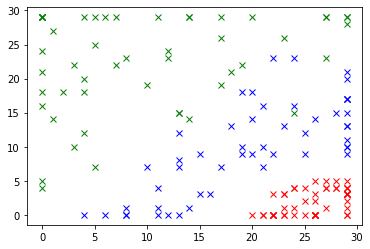

In [57]:
tested = som.mindistances(X)
colors = ['red', 'blue', 'green']
for i, m in enumerate(tested):
    plt.plot(m[1], m[0], 'x', color=colors[y[i]])
plt.show()